# The Discrete Bayes Tree

An example of building a Bayes net, then eliminating it into a Bayes tree. Mirrors the code in `testDiscreteBayesTree.cpp` .


In [1]:
from gtsam import DiscreteBayesTree, DiscreteBayesNet, DiscreteKeys, DiscreteFactorGraph, Ordering
from gtsam.symbol_shorthand import S


In [2]:
def P(*args):
    """ Create a DiscreteKeys instances from a variable number of DiscreteKey pairs."""
    #TODO: We can make life easier by providing variable argument functions in C++ itself.
    dks = DiscreteKeys()
    for key in args:
        dks.push_back(key)
    return dks

In [3]:
import graphviz
class show(graphviz.Source):
    """ Display an object with a dot method as a graph."""

    def __init__(self, obj):
        """Construct from object with 'dot' method."""
        # This small class takes an object, calls its dot function, and uses the
        # resulting string to initialize a graphviz.Source instance. This in turn
        # has a _repr_mimebundle_ method, which then renders it in the notebook.
        super().__init__(obj.dot())

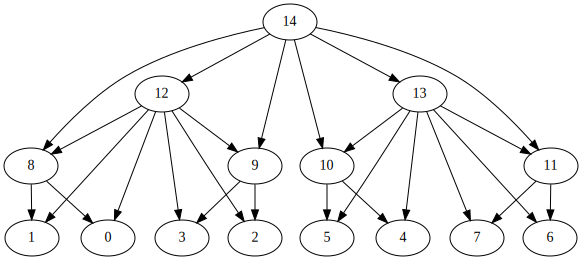

In [4]:
# Define DiscreteKey pairs.
keys = [(j, 2) for j in range(15)]

# Create thin-tree Bayesnet.
bayesNet = DiscreteBayesNet()


bayesNet.add(keys[0], P(keys[8], keys[12]), "2/3 1/4 3/2 4/1")
bayesNet.add(keys[1], P(keys[8], keys[12]), "4/1 2/3 3/2 1/4")
bayesNet.add(keys[2], P(keys[9], keys[12]), "1/4 8/2 2/3 4/1")
bayesNet.add(keys[3], P(keys[9], keys[12]), "1/4 2/3 3/2 4/1")

bayesNet.add(keys[4], P(keys[10], keys[13]), "2/3 1/4 3/2 4/1")
bayesNet.add(keys[5], P(keys[10], keys[13]), "4/1 2/3 3/2 1/4")
bayesNet.add(keys[6], P(keys[11], keys[13]), "1/4 3/2 2/3 4/1")
bayesNet.add(keys[7], P(keys[11], keys[13]), "1/4 2/3 3/2 4/1")

bayesNet.add(keys[8], P(keys[12], keys[14]), "T 1/4 3/2 4/1")
bayesNet.add(keys[9], P(keys[12], keys[14]), "4/1 2/3 F 1/4")
bayesNet.add(keys[10], P(keys[13], keys[14]), "1/4 3/2 2/3 4/1")
bayesNet.add(keys[11], P(keys[13], keys[14]), "1/4 2/3 3/2 4/1")

bayesNet.add(keys[12], P(keys[14]), "3/1 3/1")
bayesNet.add(keys[13], P(keys[14]), "1/3 3/1")

bayesNet.add(keys[14], P(), "1/3")

show(bayesNet)

In [5]:
# Sample Bayes net (needs conditionals added in elimination order!)
for i in range(5):
    print(bayesNet.sample())

DiscreteValues{0: 1, 1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0}
DiscreteValues{0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1, 9: 1, 10: 0, 11: 1, 12: 0, 13: 0, 14: 1}
DiscreteValues{0: 1, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0, 10: 1, 11: 1, 12: 0, 13: 1, 14: 0}
DiscreteValues{0: 1, 1: 1, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 0, 14: 1}
DiscreteValues{0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 1, 9: 1, 10: 0, 11: 1, 12: 0, 13: 0, 14: 1}


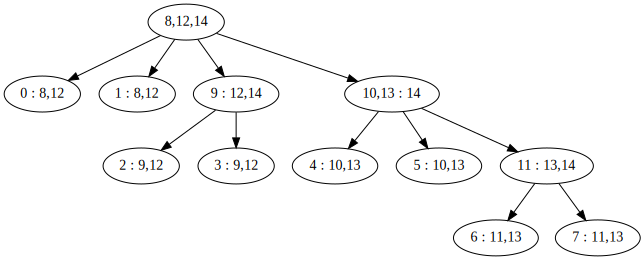

In [6]:
# Create a BayesTree out of the Bayes net.
ordering = Ordering()
for j in range(15): ordering.push_back(j)
bayesTree = DiscreteFactorGraph(bayesNet).eliminateMultifrontal(ordering)
show(bayesTree)